In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../EY Tool/data/labels_dataset_new.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,review,processed_review,label
0,It was nothing so specific,nothing specific,2
1,"Nothing, literally nothing",nothing literally nothing,0
2,"Brother, do not just put bus on the night",brother not put bus night,0
3,Initially I enjoyed working in Mesh as there w...,initially enjoyed working mesh lot learning fo...,3
4,Salary and benefits,salary benefits,0
...,...,...,...
5005,charges less parks,charges less parks,1
5006,sometimes our work life balance theory gets sc...,sometimes work life balance theory gets screwed,1
5007,sometimes work life will balance just gets scr...,sometimes work life balance gets screwed,1
5008,now i have temporarily moved away to kawasaki ...,temporarily moved away kawasaki diff team even...,1


In [3]:
df['processed_review'] = df['processed_review'].astype(str)

In [4]:
# df = df[~df['processed_review'].str.contains(r'\d')]
# df.dropna(inplace=True)

In [5]:
df

,review,processed_review,label
0,It was nothing so specific,nothing specific,2
1,"Nothing, literally nothing",nothing literally nothing,0
2,"Brother, do not just put bus on the night",brother not put bus night,0
3,Initially I enjoyed working in Mesh as there w...,initially enjoyed working mesh lot learning fo...,3
4,Salary and benefits,salary benefits,0
...,...,...,...
5005,charges less parks,charges less parks,1
5006,sometimes our work life balance theory gets sc...,sometimes work life balance theory gets screwed,1
5007,sometimes work life will balance just gets scr...,sometimes work life balance gets screwed,1
5008,now i have temporarily moved away to kawasaki ...,temporarily moved away kawasaki diff team even...,1


In [6]:
balanced_data = []
class_counts = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for index, row in df.iterrows():
    label = row['label']
    if class_counts[label] <= 500 or label == 2:
        balanced_data.append(row)
        class_counts[label] += 1
    if class_counts[2] == 1000:
        break
balanced_df = pd.DataFrame(balanced_data)

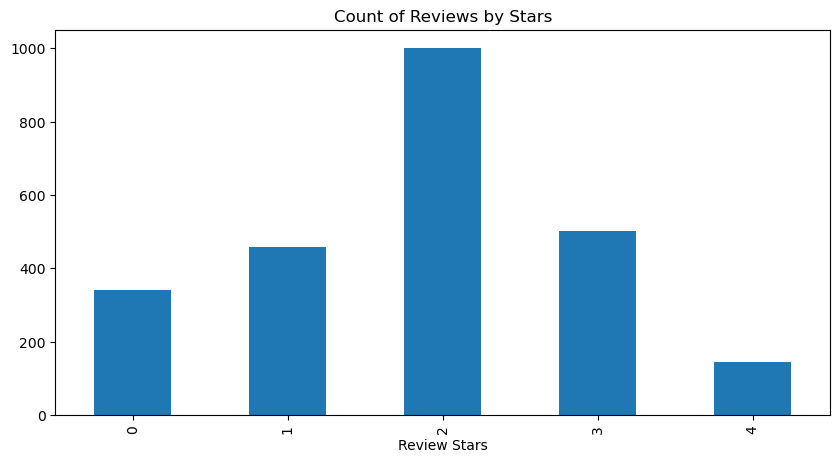

In [7]:
ax = balanced_df['label'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [8]:
label_mapping = {0: 0, 1: 0, 2: 1, 3: 2, 4: 2}
balanced_df['mapped_label'] = balanced_df['label'].map(label_mapping)
balanced_df

,review,processed_review,label,mapped_label
0,It was nothing so specific,nothing specific,2,1
1,"Nothing, literally nothing",nothing literally nothing,0,0
2,"Brother, do not just put bus on the night",brother not put bus night,0,0
3,Initially I enjoyed working in Mesh as there w...,initially enjoyed working mesh lot learning fo...,3,2
4,Salary and benefits,salary benefits,0,0
...,...,...,...,...
2943,utter nothing,utter nothing,2,1
2944,professional work culture strategies and policies,professional work culture strategies policies,2,1
2945,international work culture and economic policies,international work culture economic policies,2,1
2946,job space security,job space security,2,1


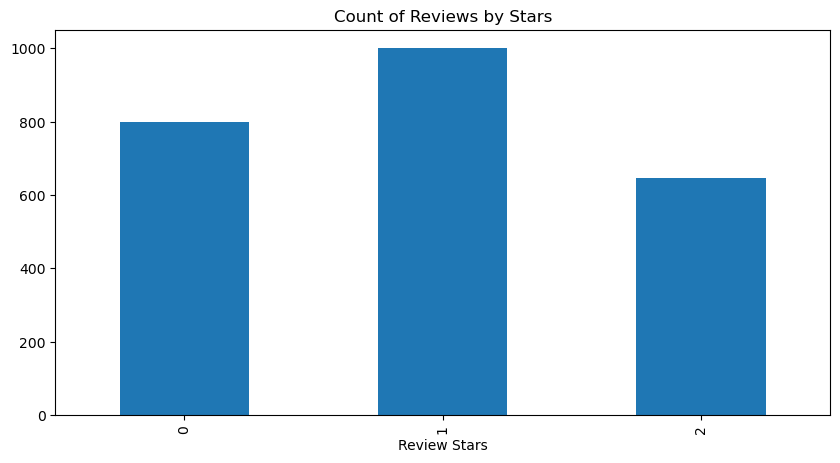

In [9]:
ax = balanced_df['mapped_label'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [10]:
import torch
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")


In [11]:
from sklearn.model_selection import train_test_split
X = balanced_df['processed_review'].tolist()
Y = balanced_df['mapped_label'].tolist()

combined_data = list(zip(X, Y))
np.random.shuffle(combined_data)
X_shuffled, Y_shuffled = zip(*combined_data)

X_train, X_temp, y_train, y_temp = train_test_split(X_shuffled, Y_shuffled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [12]:
def class_proportions(y):
    unique, counts = np.unique(y, return_counts=True)
    return dict(zip(unique, counts / len(y)))

print("Training set class proportions:", class_proportions(y_train))
print("Validation set class proportions:", class_proportions(y_val))
print("Testing set class proportions:", class_proportions(y_test))

Training set class proportions: {0: 0.33026584867075665, 1: 0.3997955010224949, 2: 0.26993865030674846}
Validation set class proportions: {0: 0.28688524590163933, 1: 0.4344262295081967, 2: 0.2786885245901639}
Testing set class proportions: {0: 0.33877551020408164, 1: 0.45714285714285713, 2: 0.20408163265306123}


In [13]:
from datasets import Dataset
all_data = {"text": X_train + X_val + X_test, "label": y_train + y_val + y_test}

# Define the sizes for training, validation, and test sets
train_size = len(X_train)
val_size = len(X_val)
test_size = len(X_test)

# Split the combined dataset into training, validation, and test sets


# Create Dataset from the modified dictionary

train_data = {"text": all_data["text"][:train_size], "label": all_data["label"][:train_size]}
val_data = {"text": all_data["text"][train_size:train_size + val_size], "label": all_data["label"][train_size:train_size + val_size]}
test_data = {"text": all_data["text"][train_size + val_size:], "label": all_data["label"][train_size + val_size:]}
# Convert data to Dataset objects

train_dataset = Dataset.from_dict(train_data)
val_dataset = Dataset.from_dict(val_data)
test_dataset = Dataset.from_dict(test_data)
train_data

{'text': ['work side',
  'working home shift timing good',
  'maori culture',
  'awesome kai prod peers top im graduates ideal startup destination anyone exiting bb',
  'work space excellent team manager amazing n supportive',
  'culture governance stakeholders',
  'good work environment culture',
  'problem mesh',
  'work culture management friendly positive',
  'nothing worst company app',
  'job cyber security',
  'good',
  'career growth promotion chances low',
  'excellent',
  'uprisings',
  'every thing fine mesh except job security trust mesh failed build layoffs employees',
  'working class culture',
  'job security especially one working 3rd party payroll recently not old enrolled employees executive level put 3rd party payroll joined mesh lied recruiting company promotes 3rd party payroll employees company payroll one show',
  'work environment learning inputs',
  '1 offroles not treated equally well like roles yearly hikes not made offroles 2 company can fire offrole employe

In [14]:
def tokenize_data(example):
    return tokenizer(example['text'], padding='max_length')
train_set = train_dataset.map(tokenize_data, batched=True)
val_set = val_dataset.map(tokenize_data, batched=True)

Map:   0%|          | 0/1956 [00:00<?, ? examples/s]

Map:   0%|          | 0/244 [00:00<?, ? examples/s]

In [15]:
train_set

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 1956
})

In [16]:
from transformers import AutoModelForSequenceClassification

# Loading a pretrain model while specifying the number of labels in our dataset for fine-tuning
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


In [18]:
batch_size = 8

# set number of epochs
number_of_epochs = 7
# let set the logging steps
logging_steps = len(train_set) // batch_size # it should log each batch 

steps = (len(train_set) / batch_size) * number_of_epochs
warmup_steps = int(0.2 * steps)



from transformers import TrainingArguments
training_args = TrainingArguments(
                                  num_train_epochs=number_of_epochs, 
                                  load_best_model_at_end=True,
                                  evaluation_strategy='steps', 
                                  save_strategy='steps',
                                  learning_rate=1e-5,
                                  logging_steps=logging_steps,
                                  warmup_steps= warmup_steps,
                                  save_steps=1000,
                                  eval_steps=500,
                                  output_dir="fine-tuned-distilbert-base-uncased"
                                  )

In [19]:
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args, train_dataset=train_set, eval_dataset=val_set,  compute_metrics = compute_metrics
)
trainer.train()

  0%|          | 0/1715 [00:00<?, ?it/s]

{'loss': 1.0107, 'grad_norm': 5.268429279327393, 'learning_rate': 7.134502923976608e-06, 'epoch': 1.0}
{'loss': 0.642, 'grad_norm': 6.21935510635376, 'learning_rate': 8.936635105608159e-06, 'epoch': 1.99}


  0%|          | 0/31 [00:00<?, ?it/s]

{'eval_loss': 0.5796594023704529, 'eval_accuracy': 0.7827868852459017, 'eval_f1': 0.780926239396272, 'eval_precision': 0.7861661966167383, 'eval_recall': 0.7827868852459017, 'eval_runtime': 14.3752, 'eval_samples_per_second': 16.974, 'eval_steps_per_second': 2.156, 'epoch': 2.04}
{'loss': 0.4941, 'grad_norm': 13.75219440460205, 'learning_rate': 7.159504734158777e-06, 'epoch': 2.99}
{'loss': 0.3846, 'grad_norm': 14.148886680603027, 'learning_rate': 5.382374362709396e-06, 'epoch': 3.98}


  0%|          | 0/31 [00:00<?, ?it/s]

{'eval_loss': 0.5636563897132874, 'eval_accuracy': 0.8360655737704918, 'eval_f1': 0.8347908798728472, 'eval_precision': 0.8378321085358961, 'eval_recall': 0.8360655737704918, 'eval_runtime': 13.5431, 'eval_samples_per_second': 18.017, 'eval_steps_per_second': 2.289, 'epoch': 4.08}
{'loss': 0.3249, 'grad_norm': 1.0434833765029907, 'learning_rate': 3.6052439912600152e-06, 'epoch': 4.98}
{'loss': 0.2845, 'grad_norm': 16.99934959411621, 'learning_rate': 1.828113619810634e-06, 'epoch': 5.98}


  0%|          | 0/31 [00:00<?, ?it/s]

{'eval_loss': 0.5926418900489807, 'eval_accuracy': 0.8360655737704918, 'eval_f1': 0.8349539636200315, 'eval_precision': 0.8384543881730195, 'eval_recall': 0.8360655737704918, 'eval_runtime': 13.2756, 'eval_samples_per_second': 18.38, 'eval_steps_per_second': 2.335, 'epoch': 6.12}
{'loss': 0.2797, 'grad_norm': 13.37600040435791, 'learning_rate': 5.098324836125273e-08, 'epoch': 6.97}
{'train_runtime': 1940.4073, 'train_samples_per_second': 7.056, 'train_steps_per_second': 0.884, 'train_loss': 0.4875786294742506, 'epoch': 7.0}


TrainOutput(global_step=1715, training_loss=0.4875786294742506, metrics={'train_runtime': 1940.4073, 'train_samples_per_second': 7.056, 'train_steps_per_second': 0.884, 'train_loss': 0.4875786294742506, 'epoch': 7.0})

In [20]:
trainer.evaluate(eval_dataset=val_set)

  0%|          | 0/31 [00:00<?, ?it/s]

{'eval_loss': 0.5636563897132874,
 'eval_accuracy': 0.8360655737704918,
 'eval_f1': 0.8347908798728472,
 'eval_precision': 0.8378321085358961,
 'eval_recall': 0.8360655737704918,
 'eval_runtime': 13.5771,
 'eval_samples_per_second': 17.971,
 'eval_steps_per_second': 2.283,
 'epoch': 7.0}

In [21]:
trainer.evaluate(eval_dataset=train_set)

  0%|          | 0/245 [00:00<?, ?it/s]

{'eval_loss': 0.28810915350914,
 'eval_accuracy': 0.9059304703476483,
 'eval_f1': 0.9060493163575466,
 'eval_precision': 0.9062980524142287,
 'eval_recall': 0.9059304703476483,
 'eval_runtime': 106.7603,
 'eval_samples_per_second': 18.321,
 'eval_steps_per_second': 2.295,
 'epoch': 7.0}

In [40]:
from transformers import pipeline
classifier = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True
)

# Example text to classify
text_to_classify = "work life balance is excellent and environment is bad"
# Perform inference
results = classifier(text_to_classify)
# Print the results
print(results)

[[{'label': 'LABEL_0', 'score': 0.7906671166419983}, {'label': 'LABEL_1', 'score': 0.11103270202875137}, {'label': 'LABEL_2', 'score': 0.09830017387866974}]]
